In [7]:
#Importing important packages

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import cv2
import time as t

print("opencv version : %s " % cv2.__version__)

opencv version : 3.1.0 


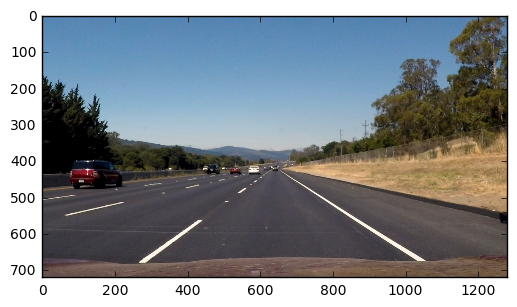

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


In [9]:
#reading in an image
path = '/Users/enterprise/Dev/Git/CarND-Advanced-Lane-Lines/straight_lines2.jpg'
image = mpimg.imread(path)

#displaying the image
plt.imshow(image)
plt.show()

#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)

#Grab the X and Y size and make copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

color_select = np.copy(image)
line_select = np.copy(image)

In [13]:
# define rgb threshold tupple
rgb_thresh = [200,200,200]

#identify pixels below the threshold
thresh_pix = (image[:,:,0]<rgb_thresh[0]) | (image[:,:,1]<rgb_thresh[1]) | (image[:,:,2]<rgb_thresh[2])
color_select[thresh_pix] = [0,0,0]

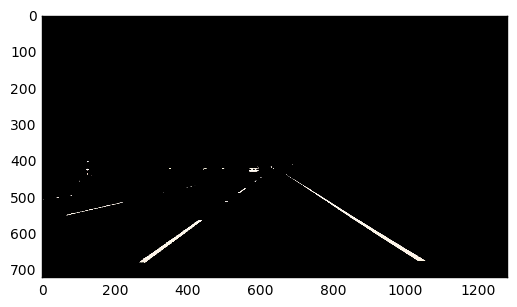

In [14]:
#Display the image
plt.imshow(color_select)

In [15]:
'''In NumPy indexing, the first dimension (camera.shape[0]) corresponds 
to rows, while the second (camera.shape[1]) corresponds to columns, 
with the origin (camera[0, 0]) on the top-left corner. 
This matches matrix/linear algebra notation, but is in contrast to 
Cartesian (x, y) coordinates.'''


'In NumPy indexing, the first dimension (camera.shape[0]) corresponds \nto rows, while the second (camera.shape[1]) corresponds to columns, \nwith the origin (camera[0, 0]) on the top-left corner. \nThis matches matrix/linear algebra notation, but is in contrast to \nCartesian (x, y) coordinates.'

In [30]:
# create copy of the image
region_select = np.copy(image)

# define region of interest

lb = [80,700]
rb = [640,360]
ap = [475,275]



## fit lines (y = Ax + B)
fitL = np.polyfit((lb[0], ap[0]), (lb[1], ap[1]), 1)
fitR = np.polyfit((rb[0], ap[0]), (rb[1], ap[1]), 1)
fitB = np.polyfit((lb[0], rb[0]), (lb[1],rb[1]), 1)

print(fitL)

[  -1.07594937  786.07594937]


720


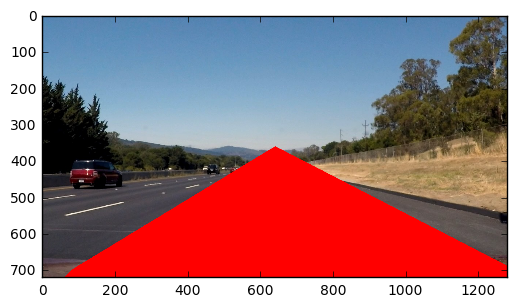

In [31]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))
region_thresh = (YY > (XX*fitL[0] + fitL[1])) & (YY > (XX*fitR[0] + fitR[1])) & (YY > (XX*fitB[0] + fitB[1]))
print(len(region_thresh))
# Color pixels red which are inside the region
region_select[region_thresh] = [255,0,0]

# Display the image
plt.imshow(region_select)

In [ ]:
print(region_thresh)
region_thresh.shape

In [ ]:
plt.imshow(region_thresh)

In [ ]:
re